In [26]:
import pickle
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from collections import defaultdict

In [3]:
gene_names = pickle.load(open('../data/gene_names.pickle','rb'))

protein_names = pickle.load(open('../data/gene_names.pickle','rb'))

In [4]:
graph_nodes = open('../data/connected_graph_nodes.csv')
header = next(graph_nodes)
nodes = set()
for line in graph_nodes:
    s=line.strip().split(',')
    nodes.add((s[1],s[0]))

In [5]:
f = '../data/log1p-normalized-counts-mesoderm-wildtype.csv'
datafile = open(f)
r = !wc -l $f
r = int(r[0].split()[0])
# Get the number of cells (columns) in the data, subtract 1 because first row is gene name
c = len(next(datafile).split(',')) - 1
print(r,c)

16273 7936


In [15]:
datafile = open(f)
header = next(datafile)
names_to_graph_ids = defaultdict(list)
data = []
data_genes = []
i=0
for line in datafile:
    s=line.strip().split(',')
    gene = s[0].lstrip('"').rstrip('"')
    gene = gene.upper()
    if gene in gene_names:
        gene_ids = gene_names[gene]
        for gene_id in gene_ids:
            gene_id = ('gene', gene_id)
            if gene_id in nodes:
                names_to_graph_ids[gene].append(gene_id)
                values = [float(x) for x in s[1:]]
                data_genes.append(gene_id)
                data.append(values)
                i += 1
                
        protein_ids = protein_names[gene]
        for protein_id in protein_ids:
            protein_id = ('protein', protein_id)
            if protein_id in nodes:
                names_to_graph_ids[protein].append(protein_id)
names_to_graph_ids = dict(names_to_graph_ids)

In [17]:
in_graph_not_data = [x for x in nodes - set(data_genes) if x[0]=='gene']
print(len(in_graph_not_data))

19


In [18]:
print(len(set(data_genes) - nodes))

0


In [19]:
data = np.array(data)

In [20]:
data.shape

(498, 7936)

## Number of nonzero measurements per gene

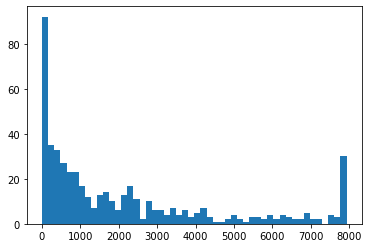

In [28]:
plt.hist((data > 0).sum(axis=1), bins=50);

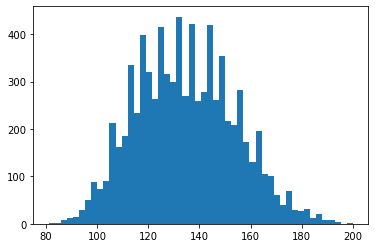

In [29]:
plt.hist((data > 0).sum(axis=0), bins=50);